In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

# 모두를 위한 머신러닝 lab11-CNN

### 3x3x1 이미지(3x3 크기의 흑백 이미지), 2x2x1 필터

In [ ]:
### 3*3*1 이미지

image = np.array([[[[1], [2], [3]], 
                   [[4], [5], [6]], 
                   [[7], [8], [9]]]], dtype=np.float32)  #> 이미지는 4차원
print(image.shape)  #> 3*3 흑백 이미지 1개

plt.imshow(image.reshape(3, 3), cmap="Greys")  #> 시각화 위해 4차원을 2차원으로

In [ ]:
### padding 없이 convolution layer 추출

# 1. 필터 준비
weight = tf.constant([[[[1.]], [[1.]]], 
                      [[[1.]], [[1.]]]])
print("필터의 크기: ", weight.shape)  #> 크기(2x2), 색상 수, 필터 갯수

conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding="VALID")  
    #> 4차원으로 넘겨준다(strides의 차원 맞춰주기 위해 앞뒤로 의미 없는 값 부여). padding="VALID" 패딩 부여x

sess = tf.Session()
conv2d_img = sess.run(conv2d)

print("컨볼루션 이미지: ", conv2d_img.shape)  #> 3x3 이미지가 2x2로 축소

conv2d_img = np.swapaxes(conv2d_img, 0, 3)  #> swapaxes() 행과 열 교체(Wx+b로 연산)
print("축의 방향 전환: ", conv2d_img)
for i, one_img in enumerate(conv2d_img):
    print("차원 변경: ", one_img.reshape(2, 2))  #> 4차원을 시각화 위해 2차원으로 변경
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(2, 2), cmap="Greys")

In [ ]:
### padding을 통한 convolution layer 추출

# 1. 필터 준비
weight = tf.constant([[[[1.]], [[1.]]], 
                      [[[1.]], [[1.]]]])
print("필터의 크기: ", weight.shape)  #> 크기(2x2), 색상 수, 필터 갯수

conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding="SAME")  
    #> 4차원으로 넘겨준다(strides의 차원 맞춰주기 위해 앞뒤로 의미 없는 값 부여)
    #> padding="SAME" 원본 크기에 맞춰서 패딩 값 부여

sess = tf.Session()
conv2d_img = sess.run(conv2d)

print("컨볼루션 이미지: ", conv2d_img.shape)  #> 패딩으로 인해 이미지 크기 변경x

conv2d_img = np.swapaxes(conv2d_img, 0, 3)  #> swapaxes() 행과 열 교체(Wx+b로 연산)
print("축의 방향 전환: ", conv2d_img)
for i, one_img in enumerate(conv2d_img):
    print("차원 변경: ", one_img.reshape(3, 3))  #> 4차원을 시각화 위해 2차원으로 변경
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(3, 3), cmap="Greys")

In [ ]:
### 3개의 필터(2*2*1*3) 사용한 convolution layer 추출

# 1. 필터 준비
weight = tf.constant([[[[1., 10, -1]], [[1., 10, -1]]], 
                      [[[1., 10, -1]], [[1., 10, -1]]]])
print("필터의 크기: ", weight.shape)  #> 크기(2x2), 색상, 필터 갯수

conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding="SAME")  
    #> 4차원으로 넘겨준다(strides의 차원 맞춰주기 위해 앞뒤로 의미 없는 값 부여)
    #> padding="SAME" 원본 크기에 맞춰서 패딩 값 부여

sess = tf.Session()
conv2d_img = sess.run(conv2d)

print("컨볼루션 이미지: ", conv2d_img.shape)  #> 패딩으로 인해 이미지 크기 변경x

conv2d_img = np.swapaxes(conv2d_img, 0, 3)  #> swapaxes() 행과 열 교체(Wx+b로 연산)
print("축의 방향 전환: ", conv2d_img)
for i, one_img in enumerate(conv2d_img):
    print("차원 변경: ", one_img.reshape(3, 3))  #> 4차원을 시각화 위해 2차원으로 변경
    plt.subplot(1, 3, i+1)
    plt.imshow(one_img.reshape(3, 3), cmap="Greys")

In [ ]:
### Max Pooling(이미지: 2*2, 커널(필터): 2*2)

# 1. 이미지 준비
image = tf.constant([[[[4], [3]], 
                      [[2], [1]]]], dtype=np.float32)

# 2. 필터 준비
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding="VALID")  #> ksize= 통해 커널 크기 지정

p = sess.run(pool)

print(p.shape)
print(p)

sess.close()

## 실습. MNIST 데이터를 이용한 CNN

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)

# 1. 데이터 확인
img = mnist.train.images[0].reshape(28, 28)  #> 시각화 위해 차원 변경
plt.imshow(img, cmap="gray")

# 2. 입력값 준비
X = tf.placeholder(tf.float32, [None, 28*28])
y = tf.placeholder(tf.float32, [None, 10])

# 3. 첫번째 convolution layer 작성 (필터의 크기: 3*3, 필터의 갯수: 32, 색상 수: 1)
x_img = tf.reshape(X, [-1, 28, 28, 1])  
    #> 머신러닝에서는 2차원으로 넘겨주었으나, 텐서플로우에서는 4차원으로 넘겨야 한다
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))

L1 = tf.nn.conv2d(x_img, W1, strides=[1, 1, 1, 1], padding="SAME")
print(L1)  #> stride가 1이고 패딩이 있으므로 크기 변화x

L1 = tf.nn.relu(L1)  #> 성능 향상 위해 relu 추가(성능 확인 필요)
print("relu 적용: ", L1)

L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
print("max_pool 적용: ", L1)

# 4. 두번째 convolution layer 작성 (필터의 크기: 3*3, 필터의 갯수: 64)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))  #> L1의 출력값 연결받아야 한다

L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding="SAME")
print(L2)  #> stride가 1이고 패딩이 있으므로 크기 변화x

L2 = tf.nn.relu(L2)  #> 성능 향상 위해 relu 추가(성능 확인 필요)
print("relu 적용: ", L2)

L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
print("max_pool 적용: ", L2)

### Fully Connected layer 작성 ( = Dense Layer)

# 1. hyper parameter 준비
learning_rate = 0.001
training_epoch = 15
batch_size = 500

# 2. graph 작성
    # 입력 데이터 준비
L2 = tf.reshape(L2, [-1, 7*7*64])  #> 4차원인 L2를 2차원으로 변환

    # 가중치
W3 = tf.Variable(tf.random_normal([7*7*64, 10]))
b = tf.Variable(tf.random_normal([10]))

    # 비용 계산과 처리
logit = tf.matmul(L2, W3) + b
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logit, labels=y))
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    # graph 구현
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for enpoch in range(training_epoch):
        total_batch = int(mnist.train.num_examples / batch_size)
        avg_cost = 0
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c = sess.run([train, cost], feed_dict={X:batch_xs, y:batch_ys})
            avg_cost += c/total_batch
            
        print("Epoch: ", "%04d"%(enpoch+1), "cost: ", "{:.9f}".format(avg_cost))
        
    correct_prediction = tf.equal(tf.argmax(logit, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("정확도: ", sess.run(accuracy, feed_dict={X:mnist.test.images, y:mnist.test.labels}))

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)

# 1. 데이터 확인
img = mnist.train.images[0].reshape(28, 28)  #> 시각화 위해 차원 변경
plt.imshow(img, cmap="gray")

In [ ]:
# 2. 입력값 준비
X = tf.placeholder(tf.float32, [None, 28*28])
y = tf.placeholder(tf.float32, [None, 10])

In [ ]:
# 3. 첫번째 convolution layer 작성 (필터의 크기: 3*3, 필터의 갯수: 32, 색상 수: 1)
x_img = tf.reshape(X, [-1, 28, 28, 1])  
    #> 머신러닝에서는 2차원으로 넘겨주었으나, 텐서플로우에서는 4차원으로 넘겨야 한다
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))

L1 = tf.nn.conv2d(x_img, W1, strides=[1, 1, 1, 1], padding="SAME")
print(L1)  #> stride가 1이고 패딩이 있으므로 크기 변화x

L1 = tf.nn.relu(L1)  #> 성능 향상 위해 relu 추가(성능 확인 필요)
print("relu 적용: ", L1)

L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
print("max_pool 적용: ", L1)

In [ ]:
# 4. 두번째 convolution layer 작성 (필터의 크기: 3*3, 필터의 갯수: 64)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))

L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding="SAME")
print(L2)

L2 = tf.nn.relu(L2)
print("relu 적용: ", L2)

L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
print("max_pool 적용: ", L2)

In [ ]:
# ++ layer 추가 (필터 크기 3*3, 필터 갯수 32)
W3 = tf.Variable(tf.random_normal([3, 3, 64, 32], stddev=0.01))  #> L1의 출력값 연결받아야 한다

L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding="SAME")
print(L3)  #> stride가 1이고 패딩이 있으므로 크기 변화x

L3 = tf.nn.relu(L3)  #> 성능 향상 위해 relu 추가(성능 확인 필요)
print("relu 적용: ", L3)

L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
print("max_pool 적용: ", L3)

In [ ]:
### 과제: Fully Connected layer 작성 ( = Dense Layer)

# 1. hyper parameter 준비
learning_rate = 0.001
training_epoch = 15
batch_size = 500

In [ ]:
# 2. graph 작성
    # 입력 데이터 준비
L3 = tf.reshape(L3, [-1, 4*4*32])  #> 4차원인 L2를 2차원으로 변환

    # 가중치
W4 = tf.get_variable("W4", shape=[4*4*32, 10], initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))

    # 비용 계산과 처리
logit = tf.matmul(L3, W4) + b
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logit, labels=y))
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [ ]:
    # graph 구현
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for enpoch in range(training_epoch):
        total_batch = int(mnist.train.num_examples / batch_size)
        avg_cost = 0
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c = sess.run([train, cost], feed_dict={X:batch_xs, y:batch_ys})
            avg_cost += c/total_batch
            
        print("Epoch: ", "%04d"%(enpoch+1), "cost: ", "{:.9f}".format(avg_cost))
        
    correct_prediction = tf.equal(tf.argmax(logit, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("정확도: ", sess.run(accuracy, feed_dict={X:mnist.test.images, y:mnist.test.labels}))

---

## Ensemble 기법 : 여러가지 모델 같이 활용

    - 여러 모델을 같이 활용하므로 성능은 좋으나, 그만큼 비용이 크다

    - Hard voting 방식: 각각의 모델 결과값 따로 구한 후, 가장 높은 값 선택

    - Soft voting 방식: 전체를 하나의 확률로 묶어, 가장 확률이 높은 값 선택

---

## 실습. 교통 표지판 인식

    - http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset
    
    - 모델링 계획
        + 이미지(32x32 로 크기 정형화) > Convolution Layer1 > Max Pooling > Convolution Layer2 > Max Pooling > FC

### 1. 이미지 전처리

    1) 크기 정형화: 32x32
    
    2) 색상 흑백으로 전처리

In [2]:
import glob  #> 여러 개의 파일 동시에 불러온다
from skimage.color import rgb2lab  #> 단일 색상 처리(흑백)
from skimage.transform import resize  #> 크기 변경
from collections import namedtuple  #> 이미지와 제목 묶어준다
np.random.seed(101)

In [3]:
N_CLASSES = 43  #> 교통표지판 종류(정답의 개수)
RESIZED_IMAGE = (32, 32)  #> 이미지 크기
    #> 관례: 상수이며 값 변경하면 안되는 변수인 경우 대문자로

Dataset = namedtuple("Dataset", ["X", "y"])  
    #> Dataset이라는 이름으로 (X, y)로 묶임. dict와 유사(X와 y를 key값으로 가질 수 있도록)
    #> dict와 차이: 읽기 전용 데이터값 보호(데이터 수정x)

In [4]:
def to_tf_format(imags):  #> 이미지 차원과 형식 변환 위한 함수 생성
    return np.stack([img[:, :, np.newaxis] for img in imags]).astype(np.float32)  #> 배열로 변환
        #> np.stack() 통해 3차원 이미지 계속 쌓아 전체 데이터 정보 얻음

In [5]:
def read_dataset_ppm(rootpath, n_labels, resize_to):  
    #> 이미지 파일(.ppm) 읽기 위한 함수 생성(이미지 경로, 정답 개수, 변경할 크기)
    images = []
    labels = []
    
    for c in range(n_labels):
        full_path = rootpath + "/" + format(c, "05d") + "/"  
            #> 05d 5자리 숫자 형식으로 c(1에서 43까지) 폴더명 생성(일치)
        
        for img_name in glob.glob(full_path + "*.ppm"):
            img = plt.imread(img_name).astype(np.float32)  
                #> 이미지를 plt.imread() 이용해 숫자로 변환하여 img 변수에 저장
                
            img = rgb2lab(img/255.0)[:, :, 0]  #> rgb 색상을 lab 색상으로 변경(0과 1로 변경)
            
            if resize_to:  #> 조건문 통해 resize_to 값이 전달되면 크기 변환
                img = resize(img, resize_to)
                
            label = np.zeros((n_labels), dtype=np.float32)  #> 43 전체를 0으로 채운 후, 해당 값에만 1 부여
            label[c] = 1.0
            
            images.append(img.astype(np.float32))
            labels.append(label)
            
    return Dataset(X=to_tf_format(images), y=np.matrix(labels).astype(np.float32))  
        #> to_tf_format() 리스트 형식의 이미지를 배열로 변환

In [6]:
dataset = read_dataset_ppm("data/GTSRB/Final_Training/Images", N_CLASSES, RESIZED_IMAGE)  #> 상위 폴더까지 경로 지정
print(dataset.X.shape)
print(dataset.y.shape)

(39209, 32, 32, 1)
(39209, 43)


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


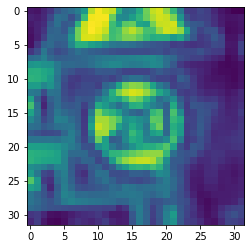

In [7]:
plt.imshow(dataset.X[0, :, :, :].reshape(RESIZED_IMAGE))
print(dataset.y[0, :])  #> 맨 처음 이미지

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


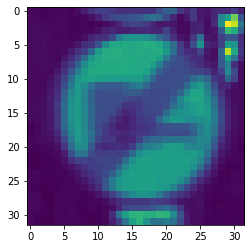

In [8]:
plt.imshow(dataset.X[-1, :, :, :].reshape(RESIZED_IMAGE))
print(dataset.y[-1, :])  #> 맨 마지막 이미지

    3) 적합도 검정 위해 훈련용 데이터 다시 훈련용과 테스트용으로 나누어 확인

In [9]:
from sklearn.model_selection import train_test_split

idx_train, idx_test = train_test_split(range(dataset.X.shape[0]), test_size=0.25, random_state=0)

X_train = dataset.X[idx_train, :, :, :]
X_test = dataset.X[idx_test, :, :, :]  #> X는 4차원

y_train = dataset.y[idx_train, :]
y_test = dataset.y[idx_test, :]  #> y는 2차원
    #> 머신러닝과 달리 텐서플로우는 X를 4차원, y는 2차원으로 넘겨야 한다

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29406, 32, 32, 1)
(9803, 32, 32, 1)
(29406, 43)
(9803, 43)


### 2. 모델 훈련과 예측

    - minibatch 이용해 데이터 나누어 불러온다

In [10]:
def minibatcher(X, y, batch_size, shuffle):  #> minibath 위함 함수 생성
    assert X.shape[0] == y.shape[0]  
        #> assert 디버깅용 예외처리(테스트). release 할 때는 자동으로 무효처리
        #> X와 y의 개수(첫번째 값)가 같으면 진행한다
    n_samples = X.shape[0]
    
    if shuffle:
        idx = np.random.permutation(n_samples)  #> np.random.permutation()  순서를 랜덤하게 섞어주는 함수
    else:
        idx = list(range(n_samples))
        
    for k in range(int(np.ceil(n_samples/batch_size))):
                   from_idx = k * batch_size
                   to_idx = (k+1) * batch_size
                   yield X[idx[from_idx:to_idx], :, :, :], y[idx[from_idx:to_idx], :]
                       #> yield : thread처리(병렬 코드작업)

In [11]:
for mb in minibatcher(X_train, y_train, 10000, True):  #> shuffle=True 통해 순서대로 암기 방지(적절하게 섞음)
    print(mb[0].shape, mb[1].shape)

(10000, 32, 32, 1) (10000, 43)
(10000, 32, 32, 1) (10000, 43)
(9406, 32, 32, 1) (9406, 43)


    1) FC layer

In [12]:
def fc_no_activation_layer(in_tensors, n_units):  #> 가중치 및 bias 학습
    W = tf.get_variable("fc_W", [in_tensors.get_shape()[1], n_units], 
                        tf.float32, tf.contrib.layers.xavier_initializer())  #> 초기값 지정
    b = tf.get_variable("fc_b", [n_units], tf.float32, tf.constant_initializer(0.0))  #> 0으로 초기값 지정
    
    return tf.matmul(in_tensors, W) + b

def fc_layer(in_tensors, n_units):
    return tf.nn.leaky_relu(fc_no_activation_layer(in_tensors, n_units))

    2) Convolution layer

In [13]:
def conv_layer(in_tensors, kernal_size, n_units):
    W = tf.get_variable("conv_W", [kernal_size, kernal_size, in_tensors.get_shape()[3], n_units], 
                        tf.float32, tf.contrib.layers.xavier_initializer())
    b = tf.get_variable("conv_b", [n_units], tf.float32, tf.constant_initializer(0.0))
    return tf.nn.leaky_relu(tf.nn.conv2d(in_tensors, W, [1, 1, 1, 1], "SAME") + b)

def maxpool_layer(in_tensors, sampling):
    return tf.nn.max_pool(in_tensors, [1, sampling, sampling, 1], [1, sampling, sampling, 1], "SAME")

def dropout(in_tensors, keep_proba, is_training):
    return tf.cond(is_training, lambda:tf.nn.dropout(in_tensors, keep_proba), lambda:in_tensors)
        #> tf.cond() 조건에 따라 선택한 코드만 실행. 상황연산자

    3) Summary
    
        + 1st 2차원 convolution : 5x5, 32필터
        + 2nd 2차원 convolution : 5x5, 64필터
        + FC : 1024 units
        + dropout : 40%
        + Softmax Active Function

In [14]:
def model(in_tensors, is_training):
    # 1st conv layer 작성: 필터 크기 5x5, 필터 개수 32개, max_pool 2개, dropout 20%
    with tf.variable_scope("L1"):
        l1 = maxpool_layer(conv_layer(in_tensors, 5, 32), 2)
        l1_out = dropout(l1, 0.8, is_training)
        
    # 2nd conv layer 작성: 5x5, 필터 개수 64개, max_pool 2개, dropout 20%
    with tf.variable_scope("L2"):
        l2 = maxpool_layer(conv_layer(l1_out, 5, 64), 2)
        l2_out = dropout(l2, 0.8, is_training)
        
    # 평면화
    with tf.variable_scope("flatten"):
        l2_out_flat = tf.layers.flatten(l2_out)
        
    # Fully Connected Layer : 1024 neurons, 40% dropout
    with tf.variable_scope("L3"):
        l3 = fc_layer(l2_out_flat, 1024)
        l3_out = dropout(l3, 0.6, is_training)
        
    # Output
    with tf.variable_scope("out"):
        out_tensors = fc_no_activation_layer(l3_out, N_CLASSES)
        
    return out_tensors

In [15]:
sess = None

def train_model(X_train, y_train, X_test, y_test, learning_rate, max_epochs, batch_size):  
        #> 최종 출력 Activation Function
    in_X_tensors_batch = tf.placeholder(tf.float32, shape=(None, RESIZED_IMAGE[0], RESIZED_IMAGE[1], 1))
        #> 이미지 차원(4차원) 맞춰줌
    in_y_tensors_batch = tf.placeholder(tf.float32, shape=(None, N_CLASSES))
    is_training = tf.placeholder(tf.bool)
    
    logits = model(in_X_tensors_batch, is_training)
    out_y_pred = tf.nn.softmax(logits)
    loss_score = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=in_y_tensors_batch)
    loss = tf.reduce_mean(loss_score)
    train = tf.train.AdamOptimizer(learning_rate).minimize(loss)  #> graph 작업 완료
    
    sess =  tf.Session()
    sess.run(tf.global_variables_initializer())
        
    for epochs in range(max_epochs):
        print("Epoch: ", epochs)
        tf_score = []
            
        for mb in minibatcher(X_train, y_train, batch_size, True):  
                #> shuffle=True 통해 순서대로 암기 방지(적절하게 섞음)
            tf_output = sess.run([train, loss], 
                                         feed_dict={in_X_tensors_batch:mb[0], in_y_tensors_batch:mb[1], is_training:True})
            tf_score.append(tf_output[1])
                
        print("training_loss_score: ", np.mean(tf_score))
        
    ### Test
    print("TEST SET PERFORMANCE")
    y_test_pred, test_loss = sess.run([out_y_pred, loss], 
                                  feed_dict={in_X_tensors_batch:X_test, in_y_tensors_batch:y_test, is_training:False})
    print("test_loss_score: ", test_loss)
    y_test_pred_classified = np.argmax(y_test_pred, axis=1).astype(np.int32)
    y_test_true_classified = np.argmax(y_test, axis=1).astype(np.int32)
    print(classification_report(y_test_true_classified, y_test_pred_classified))
    
    ### Confusion matrix
    cm = confusion_matrix(y_test_true_classified, y_test_pred_classified)

    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.colorbar()
    plt.tight_layout()
    
    plt.imshow(np.log2(cm+1), interpolation="nearest", cmap=plt.get_cmap("tab20"))
    plt.colorbar()
    plt.tight_layout()

    4) Test

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Epoch:  0
training_loss_score:  4.275515
Epoch:  1
training_loss_score:  0.66330236
Epoch:  2
training_loss_score:  0.33131075
Epoch:  3
training_loss_score:  0.20608298
Epoch:  4
training_loss_score:  0.14375322
Epoch:  5
training_loss_score:  0.11221401
Epoch:  6
tra

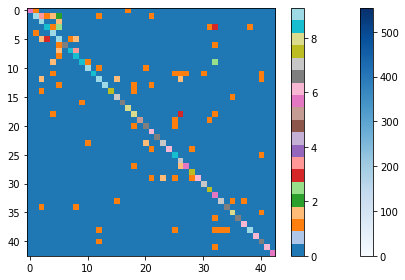

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

train_model(X_train, y_train, X_test, y_test, 0.001, 10, 256)